# Centrlity Betweeness

In [1]:
# as usual we need to import the key libraries we need to store, analyse and plot the network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# let's also get a network from the folder "data"
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [3]:
# the data comes as unweighted list of edges
# let's store the network
G=nx.Graph()
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r")
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

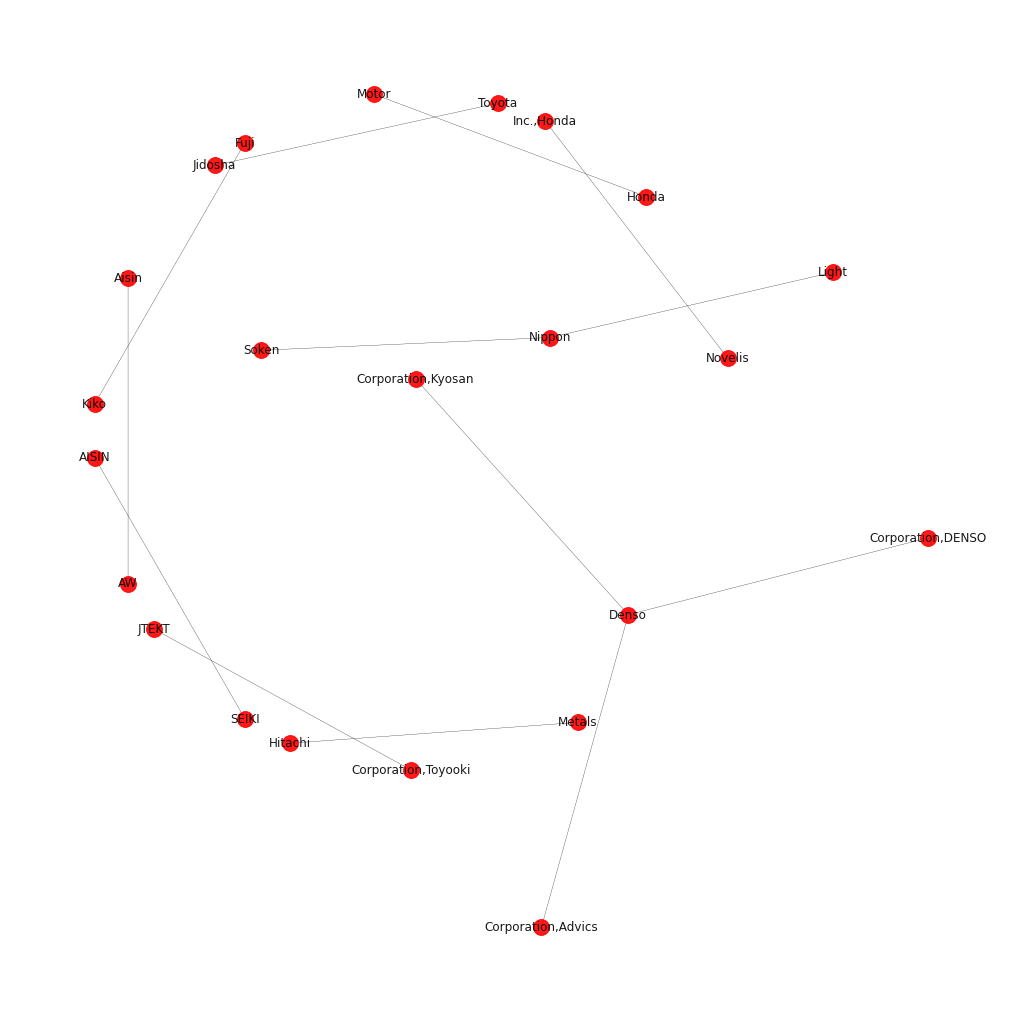

In [26]:
# let's plot the network


ids_label={} # this dictionary is needed to show the node ids
for i in G.nodes():
    ids_label[i]=str(i)

plt.figure(1,figsize=(14,14))
    
nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

# Degree Centrality 

In [5]:

for i in G.nodes():
    print (i,G.degree(i))

Nippon 2
Light 1
Novelis 1
Inc.,Honda 1
Honda 1
Motor 1
Toyota 1
Jidosha 1
Soken 1
Fuji 1
Kiko 1
Aisin 1
AW 1
AISIN 1
SEIKI 1
JTEKT 1
Corporation,Toyooki 1
Hitachi 1
Metals 1
Denso 3
Corporation,Advics 1
Corporation,DENSO 1
Corporation,Kyosan 1


In [6]:
degree=[]  # list of degree
for i in G.nodes():
        degree.append([G.degree(i),i])   # we put in the list a list of two values, the degree and id of each node
        
        
degree=sorted(degree,reverse=True)

In [7]:
# let's print the top 10
for i in range(12):
    print ("Rank = ",i+1,"Degree = ", degree[i][0], "Node id = ",degree[i][1])

Rank =  1 Degree =  3 Node id =  Denso
Rank =  2 Degree =  2 Node id =  Nippon
Rank =  3 Degree =  1 Node id =  Toyota
Rank =  4 Degree =  1 Node id =  Soken
Rank =  5 Degree =  1 Node id =  SEIKI
Rank =  6 Degree =  1 Node id =  Novelis
Rank =  7 Degree =  1 Node id =  Motor
Rank =  8 Degree =  1 Node id =  Metals
Rank =  9 Degree =  1 Node id =  Light
Rank =  10 Degree =  1 Node id =  Kiko
Rank =  11 Degree =  1 Node id =  Jidosha
Rank =  12 Degree =  1 Node id =  JTEKT


In [8]:
# we can plot the histogram of the degree
# To this end, we just need a list with all the degree values

degree_list=[]
for i in G.nodes():
    degree_list.append(G.degree(i))
    
print (degree_list)

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1]


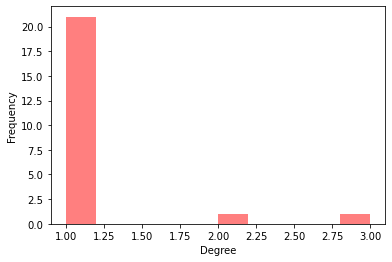

In [9]:
# we then plot it!
plt.hist(degree_list, bins=10,color='Red',alpha=0.5)   # we can specify the number of bins
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.show()

In [10]:
# it is useful to create a function that takes in input the network and plots the histogram of the degree

def degree_histogram(G): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    degree_list=[]
    for i in G.nodes():
        degree_list.append(G.degree(i))
    
    plt.hist(degree_list, bins=20,color='Red',alpha=0.5)   # we can specify the number of "bins"
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.show()
    

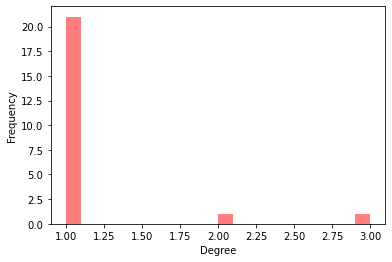

In [11]:
degree_histogram(G)

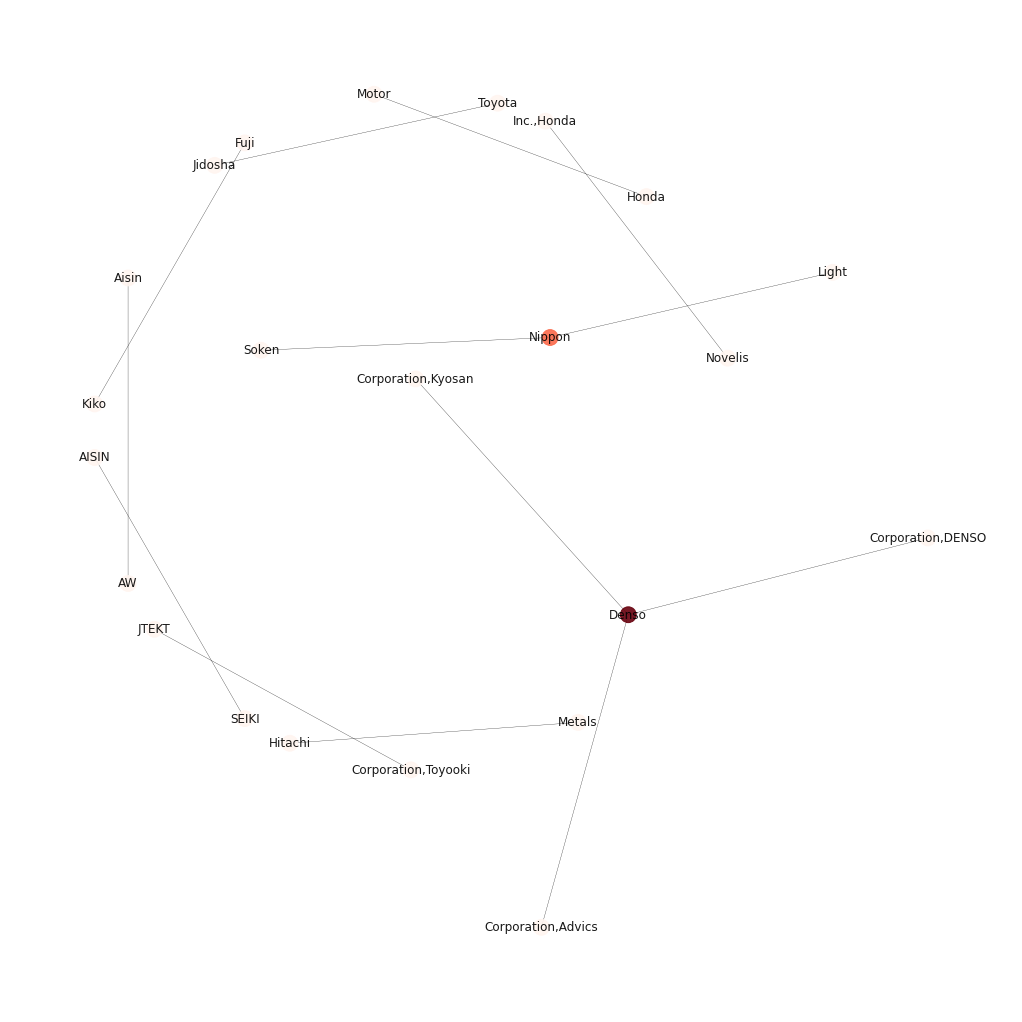

In [27]:
# we can also use the degree as attribute in the plot of the graph

color_code=[]  # this is the list
for i in G.nodes():
    color_code.append(G.degree(i))  # each element in the list is the degree of each node



# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

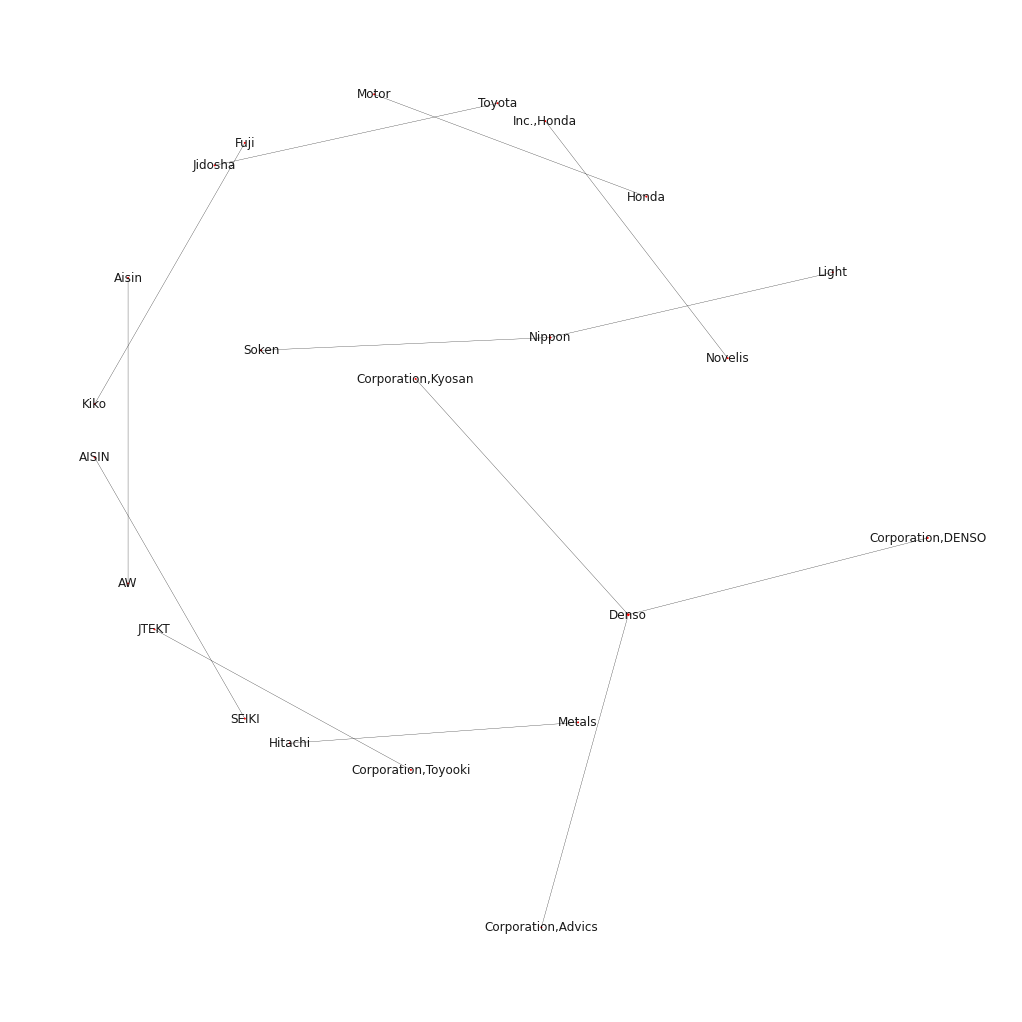

In [30]:
node_size=[]  # this is the list
for i in G.nodes():
    node_size.append(G.degree(i))  # each element in the list is the degree of each node



# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=node_size,width=0.3,edge_color="Black",cmap='Reds',
        node_color='Red',labels=ids_label,font_size=12)


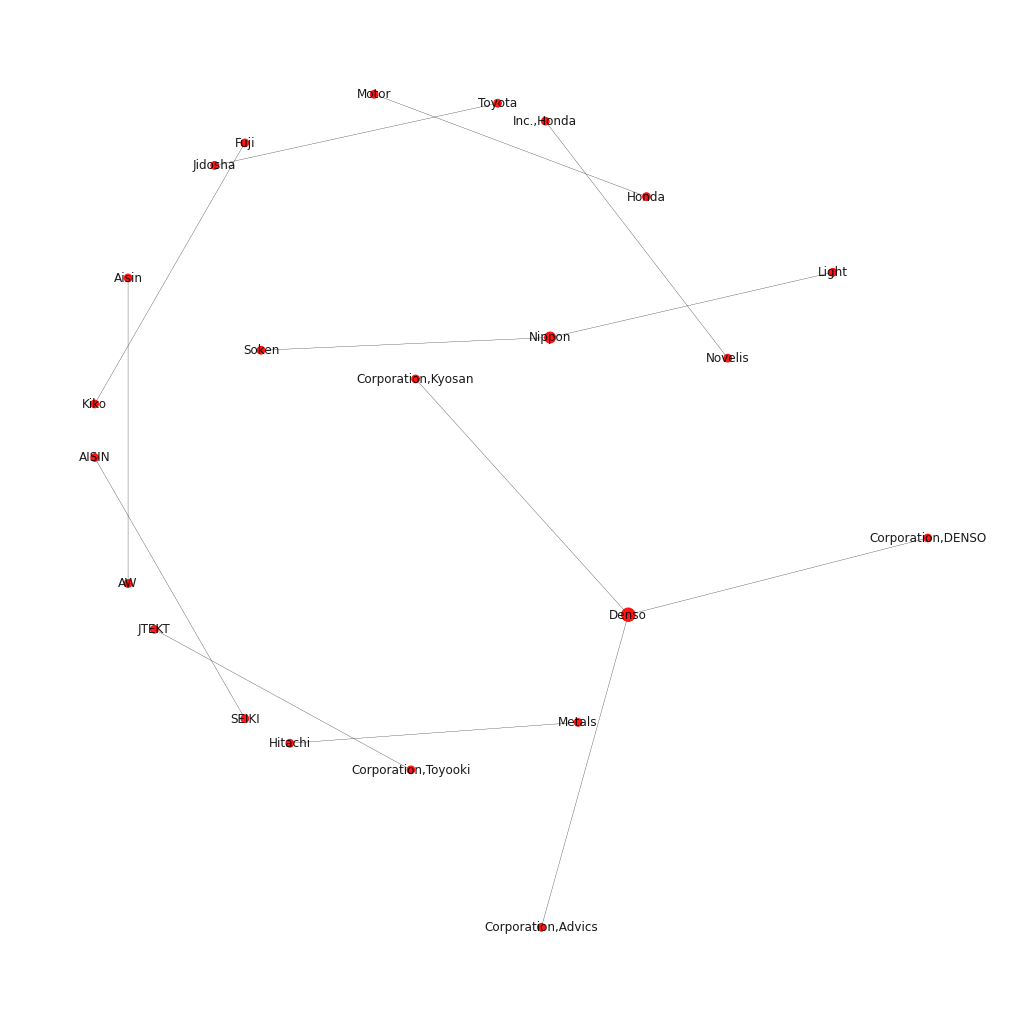

In [31]:
# looks too small!
# we can increase the size with a multiplicative factor

node_size=[]  # this is the list
for i in G.nodes():
    node_size.append(60*G.degree(i))  # each element in the list is the degree of each node



# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=node_size,width=0.3,edge_color="Black",cmap='Reds',
        node_color='Red',labels=ids_label,font_size=12)

# Closeness centrality

In [16]:
# let's read and store the network data
G=nx.Graph()
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r")
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

In [17]:
# we can compute the closeness quite easily
l=nx.closeness_centrality(G)

# let's create a list with the closeness values and see which nodes are at the top
closeness=[]
for i in G.nodes():
            closeness.append([l[i],i])
closeness=sorted(closeness,reverse=True)

In [18]:
# let's see the top 10
for i in range(10):
    print ("Rank = ",i+1,"Closeness = ", closeness[i][0], "Node id = ",closeness[i][1])

Rank =  1 Closeness =  0.13636363636363635 Node id =  Denso
Rank =  2 Closeness =  0.09090909090909091 Node id =  Nippon
Rank =  3 Closeness =  0.0818181818181818 Node id =  Corporation,Kyosan
Rank =  4 Closeness =  0.0818181818181818 Node id =  Corporation,DENSO
Rank =  5 Closeness =  0.0818181818181818 Node id =  Corporation,Advics
Rank =  6 Closeness =  0.06060606060606061 Node id =  Soken
Rank =  7 Closeness =  0.06060606060606061 Node id =  Light
Rank =  8 Closeness =  0.045454545454545456 Node id =  Toyota
Rank =  9 Closeness =  0.045454545454545456 Node id =  SEIKI
Rank =  10 Closeness =  0.045454545454545456 Node id =  Novelis


In [19]:
# so we can change the code accordingly
for i in range(10):
    print ("Rank = ",i+1,"Closeness = ", "{:.2f}".format(closeness[i][0]), "Node id = ",closeness[i][1])

Rank =  1 Closeness =  0.14 Node id =  Denso
Rank =  2 Closeness =  0.09 Node id =  Nippon
Rank =  3 Closeness =  0.08 Node id =  Corporation,Kyosan
Rank =  4 Closeness =  0.08 Node id =  Corporation,DENSO
Rank =  5 Closeness =  0.08 Node id =  Corporation,Advics
Rank =  6 Closeness =  0.06 Node id =  Soken
Rank =  7 Closeness =  0.06 Node id =  Light
Rank =  8 Closeness =  0.05 Node id =  Toyota
Rank =  9 Closeness =  0.05 Node id =  SEIKI
Rank =  10 Closeness =  0.05 Node id =  Novelis


In [20]:
def degree_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    degree_list=[]
    for i in G.nodes():
        degree_list.append(G.degree(i))
    
    plt.hist(degree_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.show()

In [21]:
# we need to change it to consider closeness
def closeness_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    l=nx.closeness_centrality(G)

    closeness_list=[]
    for i in l:
            closeness_list.append(l[i])
    
    plt.hist(closeness_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Closeness')
    plt.ylabel('Frequency')

    plt.show()

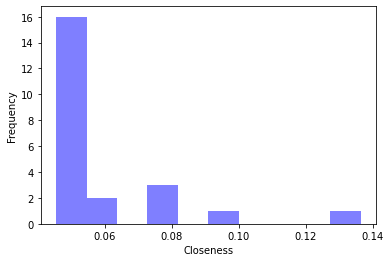

In [22]:
closeness_histogram(G,10,'blue',0.5)

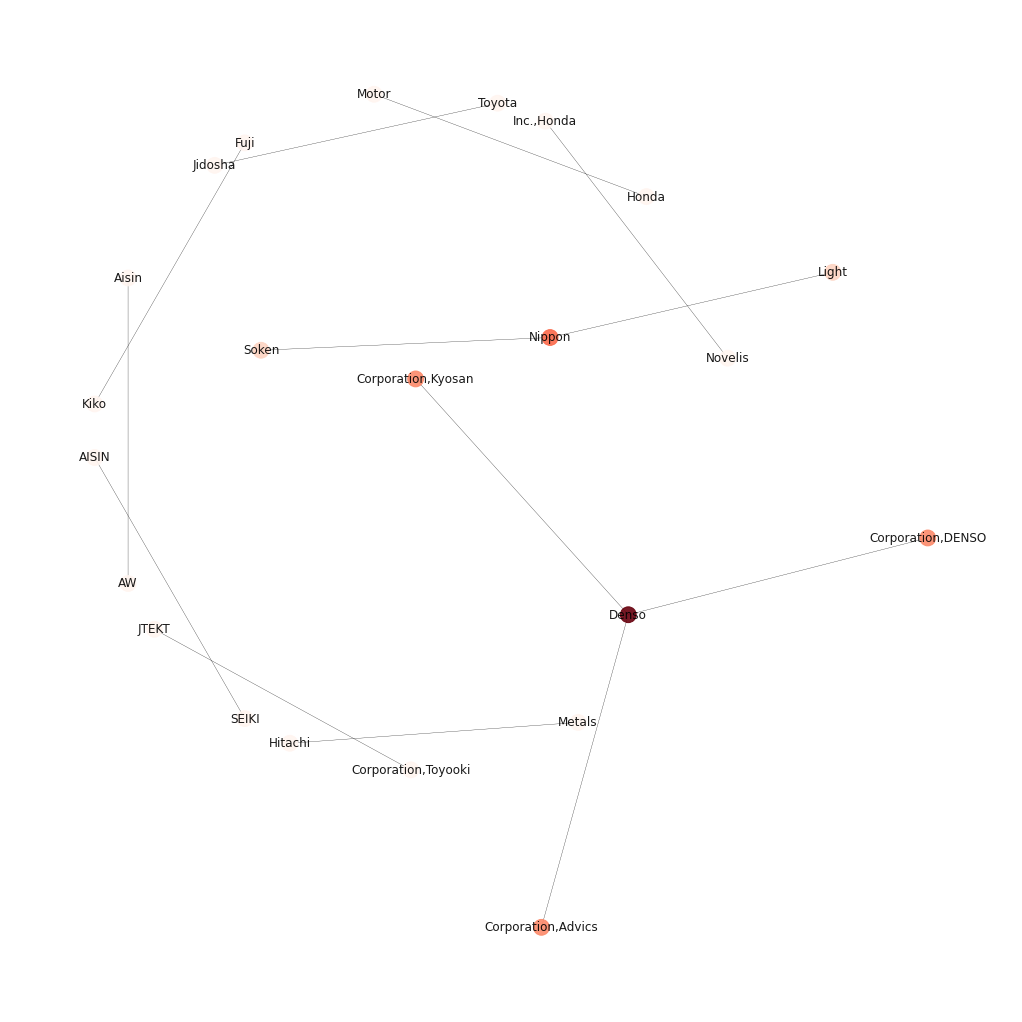

In [24]:
l=nx.closeness_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node

plt.figure(1,figsize=(14,14))


nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)